<h3>Consider the automobile dataset and perform exploratory data analysis.</h3>
a. Identify the dimension, structure, and summary of the data set<br>
b. Preprocess the dataset and treat them (like missing values, ‘na’, ?). Justify the treatment<br>
c. Plot the histogram for continuous variables (at least two) to analyse the data.<br>
d. Draw a violin plot do describe the distribution of a numerical variable to analyse the data.<br>
e. Recognize the outliers using box plot (Display the box plot before and after outlier treatment)<br>
f. Standardize the continuous variable (if any)<br>
g. Show the distribution of continuous variables using histogram<br>
h. Identify the relationship between two continuous variables using scatter plot<br>
i. Find and display the frequency of the categorical values using count plot<br>
j. Apply point plots to display one continuous and one categorical variable<br>
k. Display a heat map to display the relationship among the attributes<br>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("./Dataset/mpg_raw.csv")

In [7]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [14]:
#dimension
df.shape

(398, 9)

In [15]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [16]:
# summary
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [17]:
df.ndim

2

<h4>b. Preprocess the dataset and treat them (like missing values, ‘na’, ?). Justify the treatment</h4>

In [24]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [31]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

<h4>c. Plot the histogram for continuous variables (at least two) to analyse the data.</h4>

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

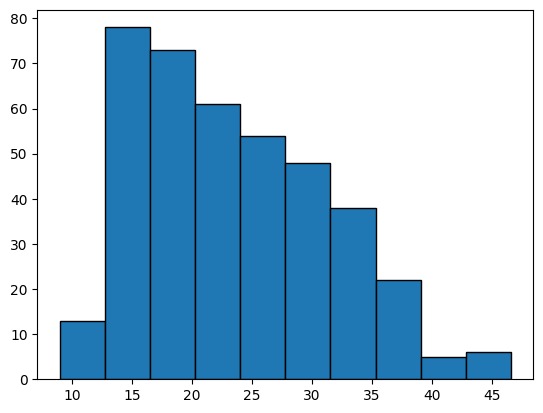

In [32]:
plt.hist(df['mpg'],edgecolor="black")

(array([ 6., 15., 50., 86., 92., 80., 45., 13.,  7.,  4.]),
 array([ 8.  ,  9.68, 11.36, 13.04, 14.72, 16.4 , 18.08, 19.76, 21.44,
        23.12, 24.8 ]),
 <BarContainer object of 10 artists>)

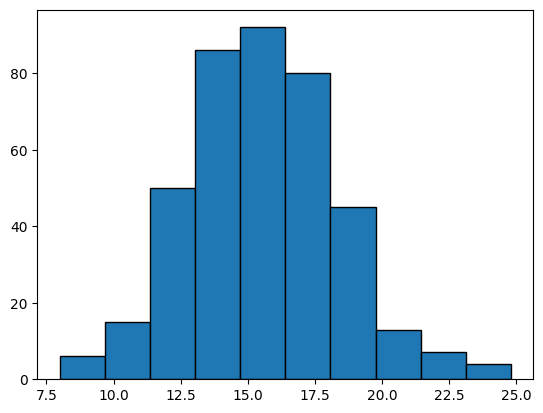

In [33]:
plt.hist(df['acceleration'],edgecolor="black")

<h4>d. Draw a violin plot do describe the distribution of a numerical variable to analyse the data.</h4>

<Axes: ylabel='acceleration'>

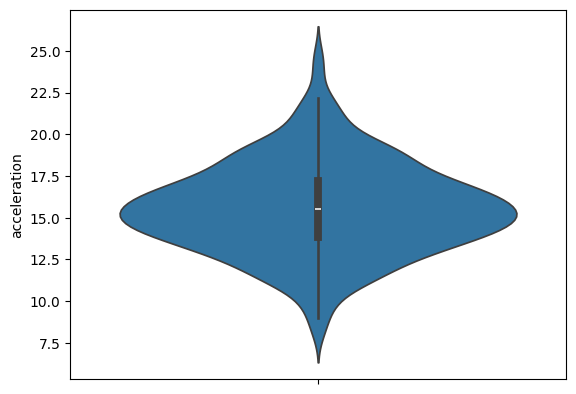

In [42]:
sns.violinplot(y='acceleration', data=df)

<h4>e. Recognize the outliers using box plot (Display the box plot before and after outlier treatment)</h4>h4

<Axes: ylabel='horsepower'>

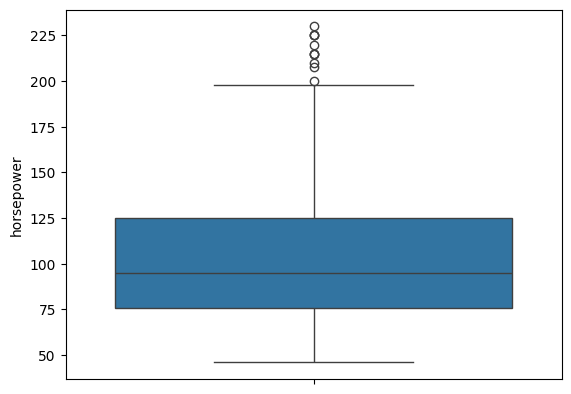

In [43]:
#Before outliers treatment
sns.boxplot(y='horsepower',data=df)

In [50]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.55)
IQR = Q3 - Q1
low_fence = Q1 - (1.5 * IQR)
high_fence = Q3 + (1.5 * IQR)
tmpdf = df[(df['horsepower'] <= high_fence)]

<Axes: ylabel='horsepower'>

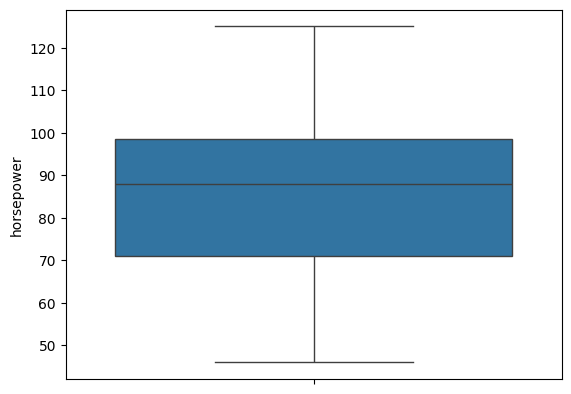

In [51]:
#After removing outliers
sns.boxplot(y=tmpdf['horsepower'])

<h4>f. Standardize the continuous variable (if any)</h4>


In [61]:
tmpdf=df.copy()
scaler=StandardScaler()
continous=tmpdf.select_dtypes(include=['float64','int64']).columns
tmpdf[continous]=scaler.fit_transform(tmpdf[continous])


In [62]:
tmpdf

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,usa,chevrolet chevelle malibu
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,usa,buick skylark 320
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,usa,plymouth satellite
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,usa,amc rebel sst
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,usa,ford mustang gl
394,2.624265,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,europe,vw pickup
395,1.087017,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,usa,dodge rampage
396,0.574601,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,usa,ford ranger


<h4>g. Show the distribution of continuous variables using histogram</h4>

(array([208.,  87., 103.]),
 array([3.        , 4.66666667, 6.33333333, 8.        ]),
 <BarContainer object of 3 artists>)

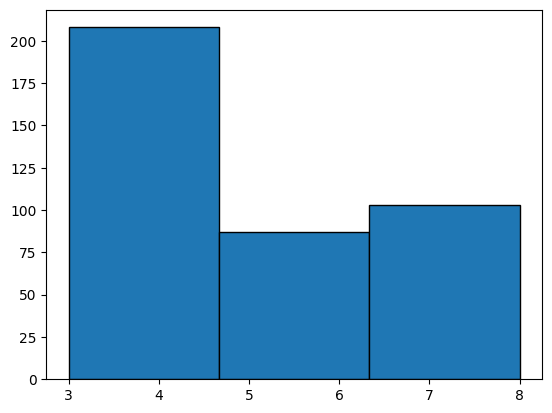

In [63]:
plt.hist(df['cylinders'],edgecolor="black",bins=3)

(array([121., 113.,  77.,  63.,  24.]),
 array([1613. , 2318.4, 3023.8, 3729.2, 4434.6, 5140. ]),
 <BarContainer object of 5 artists>)

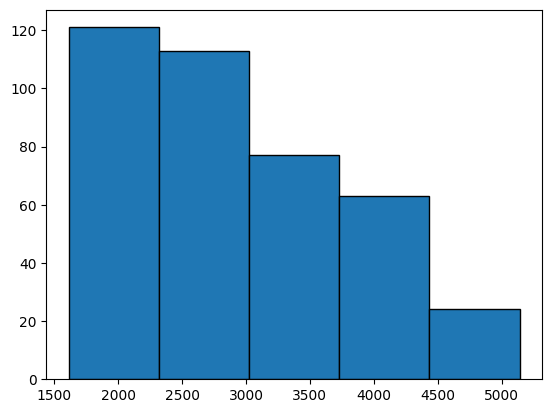

In [64]:
plt.hist(df['weight'],edgecolor="black",bins=5)

<h4>h. Identify the relationship between two continuous variables using scatter plot</h4>

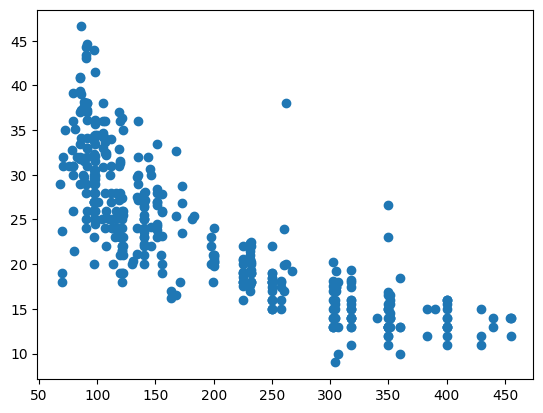

In [65]:
plt.scatter(df['displacement'],df['mpg'])

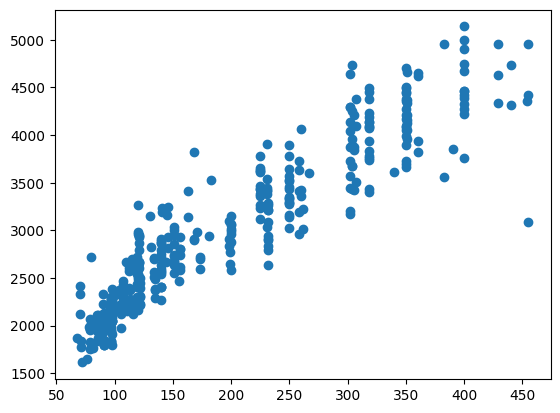

In [66]:
plt.scatter(df['displacement'],df['weight'])

<h4>i. Find and display the frequency of the categorical values using count plot</h4>

<Axes: xlabel='model_year', ylabel='count'>

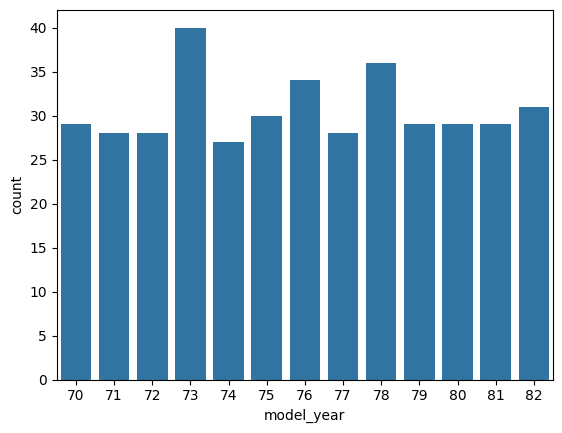

In [67]:
sns.countplot(x='model_year',data=df)

<h4>j. Apply point plots to display one continuous and one categorical variable</h4>

<Axes: xlabel='model_year', ylabel='displacement'>

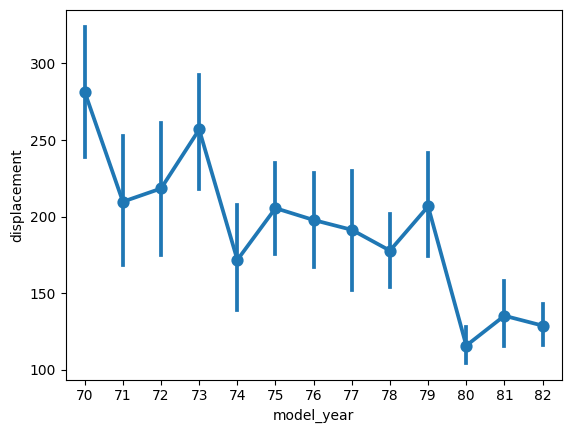

In [68]:
sns.pointplot(y='displacement',x='model_year',data=df)

<h4>k. Display a heat map to display the relationship among the attributes</h4>

In [69]:
# sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,vmin=0,vmax=1)
sns.heatmap(df)

ValueError: could not convert string to float: 'usa'